<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/ann_classification_hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
hotel = pd.read_csv('/content/hotel_bookings_updated_2024.csv')

In [ ]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel - Pune,0,23,2024,September,39,29,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2024-09-29 05:33:06.002060492,Pune
119386,City Hotel - Mumbai,0,102,2024,November,46,16,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2024-11-16 01:55:18.426320680,Mumbai
119387,City Hotel - Lucknow,0,34,2024,April,16,19,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2024-04-19 07:50:22.982016768,Lucknow
119388,City Hotel - Ahmedabad,0,109,2024,October,40,5,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad


In [ ]:
hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
hotel.shape

(119390, 33)

In [ ]:
hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel['children'] = hotel['children'].fillna(0)

In [ ]:
hotel['country'] = hotel['country'].fillna('Unknown')

In [ ]:
hotel['agent'] = hotel['agent'].fillna(0)
hotel['company'] = hotel['company'].fillna(0)


In [ ]:
hotel.dropna(inplace=True)

In [ ]:
hotel.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
hotel.duplicated().sum()

np.int64(0)

In [ ]:
hotel.drop_duplicates(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in hotel.select_dtypes(include='object').columns:
  hotel[i] = le.fit_transform(hotel[i])

In [ ]:
X = hotel.drop('is_canceled', axis=1)
y = hotel['is_canceled']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in X.columns:
  X[i] = sc.fit_transform(X[[i]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((95512, 32), (23878, 32), (95512,), (23878,))

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(32,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9293 - loss: 0.1878 - val_accuracy: 0.9993 - val_loss: 0.0068
Epoch 2/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9995 - loss: 0.0058 - val_accuracy: 0.9998 - val_loss: 0.0030
Epoch 3/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 4/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9999 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 6.9790e-04
Epoch 5/5
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 1.0000 - loss: 4.5229e-04 - val_accuracy: 1.0000 - val_loss: 4.0903e-04


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 3.0186e-04
Test Loss: 0.0004
Test Accuracy: 1.0000


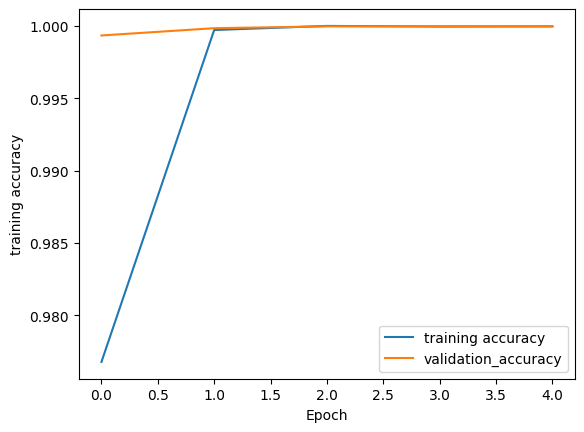

In [ ]:
plt.plot(history.history["accuracy"],label="training accuracy")
plt.plot(history.history["val_accuracy"],label="validation_accuracy")
plt.xlabel("Epoch")
plt.ylabel("training accuracy")
plt.legend()
plt.show()

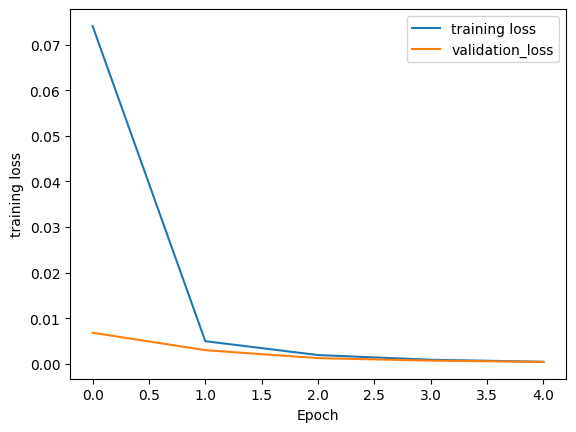

In [ ]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.xlabel("Epoch")
plt.ylabel("training loss")
plt.legend()
plt.show()

In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,18,0,342,2024,5,30,27,0,0,2,...,0.0,0.0,0,2,0.0,0,0,1,43426,3
1,28,0,737,2024,0,17,28,0,0,2,...,0.0,0.0,0,2,0.0,0,0,1,24703,13
2,20,0,7,2024,11,37,10,0,1,1,...,0.0,0.0,0,2,75.0,0,0,1,52529,5
3,26,0,13,2024,1,33,14,0,1,1,...,304.0,0.0,0,2,75.0,0,0,1,47115,11
4,27,0,14,2024,11,37,14,0,2,2,...,240.0,0.0,0,2,98.0,0,1,1,53433,12


In [ ]:
def model_prediction(hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,
                    arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,
                    previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,
                    reservation_status,reservation_status_date,city):
    pass